In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.models import load_model


In [3]:
# Load the saved model
model = load_model("e_waste_classifier_model.h5")


In [5]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 100

# Load raw training dataset to get class names
raw_train_ds = image_dataset_from_directory(
    "modified-dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# Extract class names BEFORE preprocessing
class_names = raw_train_ds.class_names

# Preprocessing function
def prepare(ds):
    ds = ds.map(lambda x, y: (preprocess_input(x), y))
    return ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Final processed training dataset (for consistency)
train_ds = prepare(raw_train_ds)

# Load and prepare test dataset
test_ds_raw = image_dataset_from_directory(
    "modified-dataset/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)
test_ds = prepare(test_ds_raw)


Found 2400 files belonging to 10 classes.
Found 300 files belonging to 10 classes.


In [7]:
# Evaluate accuracy and loss
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 697ms/step - accuracy: 0.9417 - loss: 0.1780
✅ Test Accuracy: 0.9433


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step  


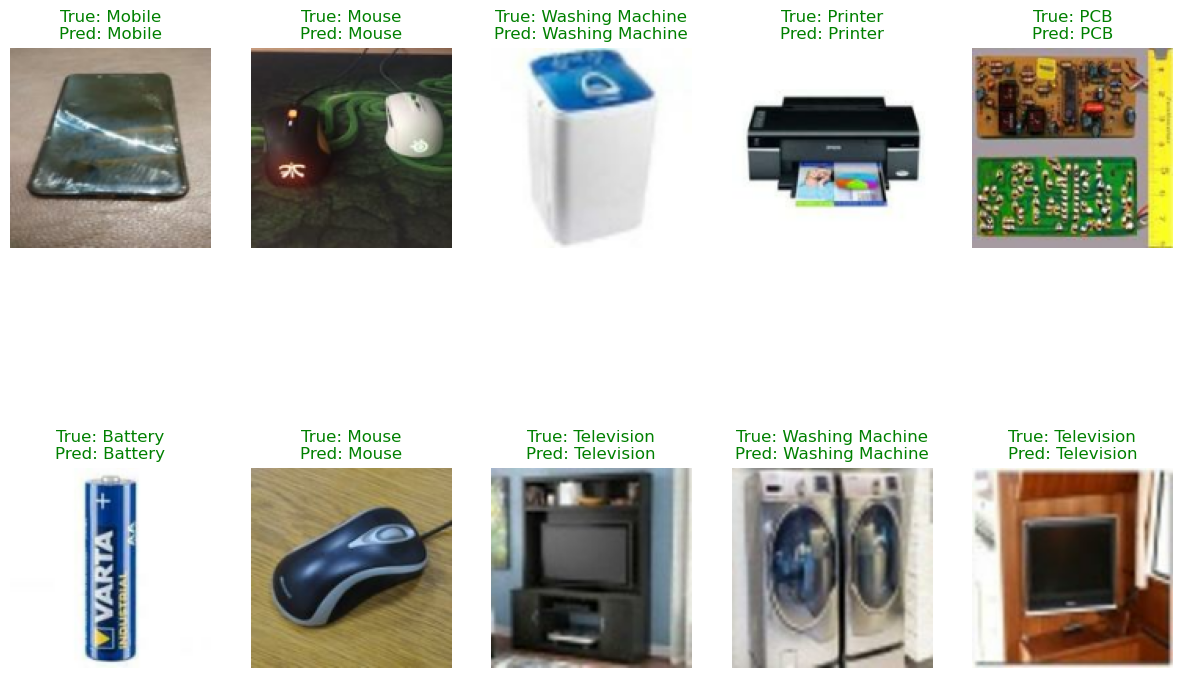

In [9]:
# Show predictions vs. true labels for 10 images
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    predicted_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(15, 10))
    for i in range(10):
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        pred_label = class_names[predicted_labels[i]]
        color = "green" if pred_label == true_label else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis("off")
    break
